# Mapa de posiciones de estaciones

Mapa para: Luis Fernando Ricardez Puente
Realizado por: Adolfo Perez Estrada

In [16]:
import pandas as pd
import netCDF4 as nc
import numpy as np
import geopandas as gpd
import seaborn as sns
import shapely
from shapely.geometry import shape, Polygon, Point, MultiPoint, box, LineString

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import cartopy
from cartopy import config
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# Abrimos el archivo de observation well y municipios
direccion_puntos = 'map_LFRP/puntos.shp'
obs_well = gpd.read_file(direccion_puntos)

direccion_municipios = 'muni_2018gw/muni_2018gw.shp'
municipios = gpd.read_file(direccion_municipios)

direccion_estados = 'dest_2015gw/dest_2015gw.shp'
estados = gpd.read_file(direccion_estados)

<AxesSubplot:>

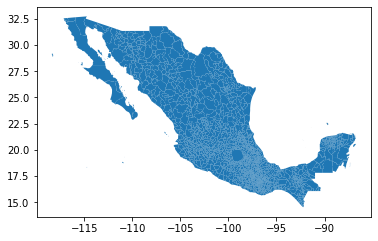

In [3]:
ax = obs_well.plot()
municipios.plot(ax=ax)

In [4]:
Estaciones = pd.read_csv('map_LFRP/Estaciones.csv')

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

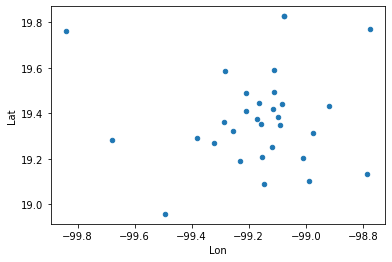

In [5]:
Estaciones.plot(x='Lon', y='Lat', kind= 'scatter')

In [6]:
Estaciones['geometry']=Estaciones[['Lon','Lat']].apply(Point,axis=1)

C:\Users\adolf\miniconda3\envs\geopandas_testenv\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [9]:
Estaciones

,Clave,Nombre,Lugar,Lat,Lon,VM,geometry
0,AMVM,Amecameca,Estado de México,19.131894,-98.785873,VM,POINT (-98.78587 19.13189)
1,AOVM,Álvaro Obregón,Ciudad de México,19.267567,-99.321900,VM,POINT (-99.32190 19.26757)
2,APVM,Azcapotzalco,Ciudad de México,19.488017,-99.208650,VM,POINT (-99.20865 19.48802)
3,ATVM,Atlacomulco,Estado de México,19.761847,-99.841048,VM,POINT (-99.84105 19.76185)
4,AZVM,Atizapán,Estado de México,19.584833,-99.282932,VM,POINT (-99.28293 19.58483)
5,BJVM,Benito Juárez,Ciudad de México,19.374986,-99.170690,VM,POINT (-99.17069 19.37499)
6,CHVM,Chichinautzin,Morelos,19.088367,-99.147483,VM,POINT (-99.14748 19.08837)
7,CIVM,Cerro de Cilcuayo,Ciudad de México,19.103550,-98.988117,VM,POINT (-98.98812 19.10355)
8,CJVM,Cuajimalpa,Ciudad de México,19.361647,-99.285089,VM,POINT (-99.28509 19.36165)
9,COVM,Coyoacán,Ciudad de México,19.351100,-99.156167,VM,POINT (-99.15617 19.35110)


In [7]:
Estaciones_gpd = gpd.GeoDataFrame(Estaciones,crs='EPSG:4326')

In [10]:
#%matplotlib notebook 

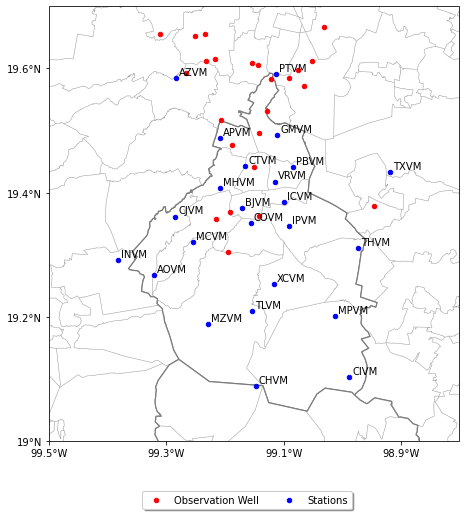

In [17]:
f, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection":ccrs.PlateCarree()})

ax.set_extent([-99.5, -98.8, 19, 19.7], ccrs.PlateCarree())

ax.set_xticks(np.arange(-99.5,-98.7,0.2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(19,19.7,0.2), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


estados.plot(ax=ax, color = 'w', edgecolor='k', linewidth=1.2)
municipios.plot(ax=ax, color = 'w', edgecolor='gray', linewidth=0.5, alpha = 0.5)
obs_well.plot( color = 'red', markersize = 20, legend=True,label ="Observation Well", ax=ax)
Estaciones_gpd.plot(color = 'blue',markersize = 20, legend=True,label = "Stations",ax=ax)

for x, y, label in zip(Estaciones_gpd.geometry.x, Estaciones_gpd.geometry.y, Estaciones_gpd.Clave):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    
#ax.legend().set_visible(True)

#LEYENDA COMPARTIDA
lines, labels = f.axes[-1].get_legend_handles_labels()
    
f.legend(lines, labels, loc = 'lower center', bbox_to_anchor=(0.5, -0.001),ncol=2, fancybox=True, shadow=True)
ax.legend().set_visible(False)

plt.savefig("Map_LFRP.jpeg", dpi= 300, bbox_inches='tight')

In [4]:
## Nuevo mapa

In [40]:
df = pd.DataFrame()
df.loc[0,'x'] = -99.1296
df.loc[0,'y'] = 19.4368
df['geometry'] = df[['x','y']].apply(Point, axis = 1)
gdf = gpd.GeoDataFrame(df, crs = 'EPSG:4326')
gdf.loc[0,'Clave'] = 'MULU'

C:\Users\adolf\miniconda3\envs\geopandas_testenv\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [41]:
gdf

,x,y,geometry,Clave
0,-99.1296,19.4368,POINT (-99.12960 19.43680),MULU


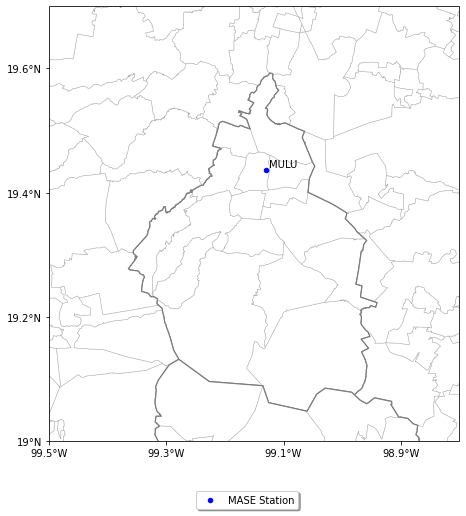

In [44]:
f, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection":ccrs.PlateCarree()})

ax.set_extent([-99.5, -98.8, 19, 19.7], ccrs.PlateCarree())

ax.set_xticks(np.arange(-99.5,-98.7,0.2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(19,19.7,0.2), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


estados.plot(ax=ax, color = 'w', edgecolor='k', linewidth=1.2)
municipios.plot(ax=ax, color = 'w', edgecolor='gray', linewidth=0.5, alpha = 0.5)
gdf.plot(color = 'blue',markersize = 20, legend=True,label = "MASE Station",ax=ax)

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.Clave):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    
#ax.legend().set_visible(True)

#LEYENDA COMPARTIDA
lines, labels = f.axes[-1].get_legend_handles_labels()
    
f.legend(lines, labels, loc = 'lower center', bbox_to_anchor=(0.5, -0.001),ncol=2, fancybox=True, shadow=True)
ax.legend().set_visible(False)

plt.savefig("Map_LFRP_estacion.jpeg", dpi= 300, bbox_inches='tight')

In [38]:
gdf

,x,y,geometry
0,-99.1296,19.4368,POINT (-99.12960 19.43680)
